## Describing drugs using consumer reviews
### In this notebook we are using 161297 reviews of many people to make some analysis related drugs rating and prescription, in the end we will be ready to evaluate and indicated drugs by patient condition acordind their reviews, keep in mind this notebook is a study case and cannot be used to real world application without a health professional!

In [1]:
# Import packages and making some configurations
import numpy as np
import pandas as pd
import string

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

import ipywidgets
from ipywidgets import interact

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

In [2]:
# Import and read the dataset
data = pd.read_csv('drug.csv')

In [3]:
# Lets print the shape of the data
print("The shape of the dataset is: ", data.shape)

The shape of the dataset is:  (161297, 7)


In [4]:
# Lets print the first 5 data from dataset
data.head()

uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37

In [5]:
# Which are the 5 most common conditions
data['condition'].value_counts().sort_values(ascending = False).head(5)

Birth Control    28788
Depression        9069
Pain              6145
Anxiety           5904
Acne              5588
Name: condition, dtype: int64

In [6]:
#Lets Explore some of the Important Column in the dataset
print("Number of the Unique Drugs present in the dataset: ", data['drugName'].nunique())
print("Number os the Unique Medical Conditions present in the dataset: ", data['condition'].nunique())

# Period of data Collection
print("\nTime period of Collecting data")
print("Starting Date: ", data['date'].min())
print("Ending Date: ", data['date'].max())

Number of the Unique Drugs present in the dataset:  3436
Number os the Unique Medical Conditions present in the dataset:  884

Time period of Collecting data
Starting Date:  1-Apr-08
Ending Date:  9-Sep-17


## Summarizing the Dataset

In [7]:
# How many numerical column exists in the dataset
data.describe().columns

Index(['uniqueID', 'rating', 'usefulCount'], dtype='object')

In [8]:
# Lets describe some columns of the Dataset
data[['rating', 'usefulCount']].describe()

rating    usefulCount
count  161297.000000  161297.000000
mean        6.994377      28.004755
std         3.272329      36.403742
min         1.000000       0.000000
25%         5.000000       6.000000
50%         8.000000      16.000000
75%        10.000000      36.000000
max        10.000000    1291.000000

In [9]:
#Lets check the number and name of the Drugs with 0 Useful Count in detail
print("Analysis on Useless Drugs")
print("-------------------------")
print("The number of Drugs with no Useful count: ", data[data['usefulCount'] == 0].count()[0])

#Lets check the number of Drugs with no Useful Count with Review Greater than or Equal to 8
print("The number of good Drugs with Lsser Useful counts: ", data[(data['usefulCount'] ==0) &
                                                             data['rating'] >= 8].count()[0])

#Lets check the Average rating of the drugs with no Useful Count
print("The average rating of Drugs with no Useful Count: {0:.2f}".format(data[data['usefulCount'] == 0]['rating'].mean()))

# Lets check the Useful Drugs
print("\nAnalysis on Useful Drugs")
print("--------------------------")
print("The Number of Drugs with greater than 1000 Useful Counts: ", data[data['usefulCount'] > 1000].count()[0])
print("Average rating of Drugs with 1000+ Useful Counts: ", data[data['usefulCount']> 1000]['rating'].mean())
print("\nName and Condition of these Drugs \n\n",
     data[data['usefulCount'] > 1000][['drugName', 'condition', 'rating', 'usefulCount']].sort_values(
                                     by='usefulCount', ascending=False).reset_index(drop=True))

Analysis on Useless Drugs
-------------------------
The number of Drugs with no Useful count:  6318
The number of good Drugs with Lsser Useful counts:  0
The average rating of Drugs with no Useful Count: 5.80

Analysis on Useful Drugs
--------------------------
The Number of Drugs with greater than 1000 Useful Counts:  4
Average rating of Drugs with 1000+ Useful Counts:  10.0

Name and Condition of these Drugs 

          drugName      condition  rating  usefulCount
0      Sertraline     Depression      10         1291
1          Zoloft     Depression      10         1291
2          Mirena  Birth Control      10         1247
3  Levonorgestrel  Birth Control      10         1247


In [10]:
# Lets summarize the categorical data also
categorical_data = data.describe(include='object').columns
print("Categorical Columns: ",categorical_data.values)
data[categorical_data].describe(include='object')

Categorical Columns:  ['drugName' 'condition' 'review' 'date']


drugName      condition  review      date
count           161297         160398  161297    161297
unique            3436            884  112329      3579
top     Levonorgestrel  Birth Control  "Good"  1-Mar-16
freq              3657          28788      33       146

### Check Missing Values

In [11]:
# Lets check for missing values
data.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [12]:
#The condiction feature is very important to prescribe the good drug, so we'll delete all the records where condition is null
data = data.dropna()

# Lets check the missing value now
data.isnull().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

### Check the Distribution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


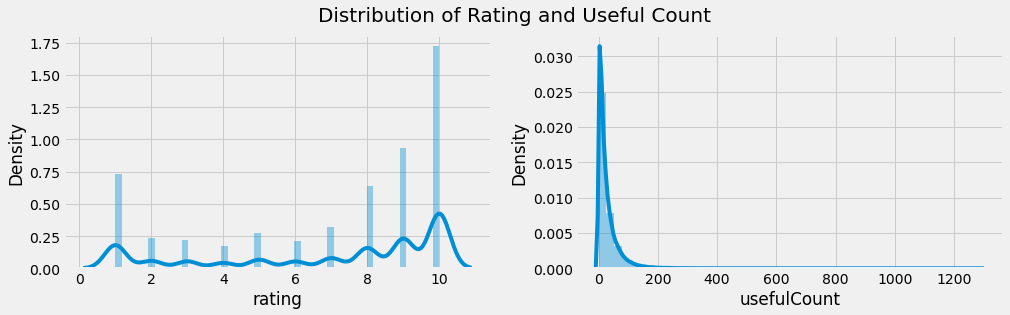

In [13]:
# Lets check the Distribution of the feature Rating and Useful Count
plt.rcParams['figure.figsize'] = (15, 4)

# Ploting the Rating
plt.subplot(1,2,1)
sns.distplot(data['rating'])

# Ploting the usefulCount
plt.subplot(1,2,2)
sns.distplot(data['usefulCount'])
plt.suptitle("Distribution of Rating and Useful Count \n", fontsize=20)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


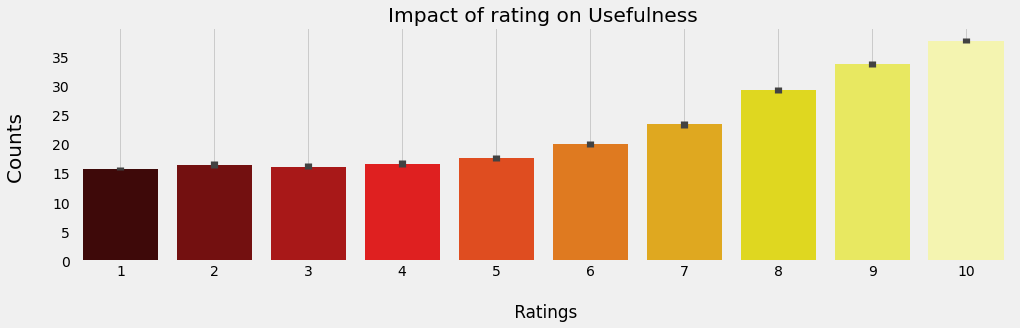

In [14]:
#lets check the Impact Rating on Usefulness
plt.rcParams['figure.figsize'] = (15, 4)
sns.barplot(data['rating'], data['usefulCount'], palette = 'hot')
plt.grid()
plt.title('Impact of rating on Usefulness')
plt.xlabel('\n Ratings')
plt.ylabel('Counts \n', fontsize = 20)
plt.show()

In [15]:
# Lets check the impact of the review length on ratings of Drugs
# for that we need to create a new column to calculate Length of the reviews
data['len'] = data['review'].apply(len)

In [16]:
data.head()

uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  len  
0           27   79  
1          192  741  
2           17  755  
3           10  448  
4           37  719

In [17]:
# Lets Check the impact of Length of reviews on ratings
data[['rating', 'len']].groupby(['rating']).agg(['min', 'mean', 'max'])

len                   
       min        mean    max
rating                       
1        5  428.784505   3692
2        9  452.902893  10787
3        8  461.249961   5112
4        7  464.077912   3030
5        6  477.982661   2048
6        4  467.957150   2202
7        6  485.597765   3063
8        3  483.584163   4087
9        3  477.696117   6182
10       3  443.215923   6192

Result: there is not a clear pattern related review lenghts and rating, because the mean value is very similar, check the ploting below:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


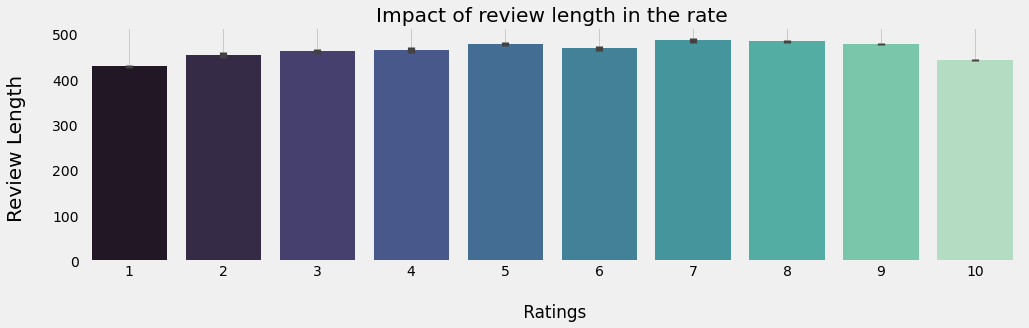

In [18]:
# lets check the Impact review length on the rating
plt.rcParams['figure.figsize'] = (15, 4)
sns.barplot(data['rating'], data['len'], palette = 'mako')
plt.grid()
plt.title('Impact of review length in the rate')
plt.xlabel('\n Ratings')
plt.ylabel('Review Length \n', fontsize = 20)
plt.show()

In [19]:
# Just to curious thing, lets the check the Longest review
print("Length of longest Review is: ", data['len'].max())
data['review'][data['len'] == data['len'].max()].iloc[0]

Length of longest Review is:  10787


'"Two and a half months ago I was prescribed Venlafaxine to help prevent chronic migraines.\r\nIt did help the migraines (reduced them by almost half), but with it came a host of side effects that were far worse than the problem I was trying to get rid of.\r\nHaving now come off of the stuff, I would not recommend anyone ever use Venlafaxine unless they suffer from extreme / suicidal depression. I mean extreme in the most emphatic sense of the word. \r\nBefore trying Venlafaxine, I was a writer. While on Venlafaxine, I could barely write or speak or communicate at all. More than that, I just didn&#039;t want to. Not normal for a usually outgoing extrovert.\r\nNow, I&#039;m beginning to write again - but my ability to speak and converse with others has deteriorated by about 95%. Writing these words is taking forever; keeping up in conversation with even one person is impossible, and I barely see the point of trying either. On Venlafaxine, words pretty much left me - my conversational vo

## Cleaning the Reviews
### As it's clear that the reviews have so many unnecessary things such as Stopwords, Punctuations, Numbers

In [23]:
# First lets remove the Punctuations from the reviews
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str
data['review'] = data['review'].apply(punctuation_removal)

In [24]:
# Now lets Remove the stopwords also (this process can take long time)
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop = stopwords.words('english')
stop.append("i'm")
stop_words = []

for item in stop:
    new_item = punctuation_removal(item)
    stop_words.append(new_item)
    
def stopwords_removal(messy_str):
    messy_str = word_tokenize(messy_str)
    return [word.lower() for word in messy_str
           if word.lower() not in stop_words]

data['review'] = data['review'].apply(stopwords_removal) 

In [25]:
# lets remove the Numbers also
import re
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ' '.join(list_text_new)

data['review'] = data['review'].apply(drop_numbers)

In [26]:
# For using Sentiment Analyzer we will have to dowload the Vader Lexicon from NLTK
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HudsonCarol\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [27]:
# lets calculate the Sentiments from Reviews
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

train_sentiments = []
for i in data['review']:
    train_sentiments.append(sid.polarity_scores(i).get('compound'))
    
train_sentiments = np.asarray(train_sentiments)
data['sentiment'] = pd.Series(data=train_sentiments)

In [28]:
#Lets check the impact of sentiments on reviews
data[['rating', 'sentiment']].groupby(['rating']).agg(['min','mean','max'])

sentiment                  
             min      mean     max
rating                            
1        -0.6486  0.001019  0.6369
2        -0.5423  0.000796  0.6369
3        -0.6369  0.000436  0.6249
4         0.0000  0.001576  0.6369
5        -0.5423  0.000802  0.6249
6         0.0000  0.001016  0.6369
7        -0.5423  0.000973  0.6369
8        -0.4404  0.000921  0.6369
9        -0.6597  0.000966  0.6369
10       -0.6486  0.001085  0.6369

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


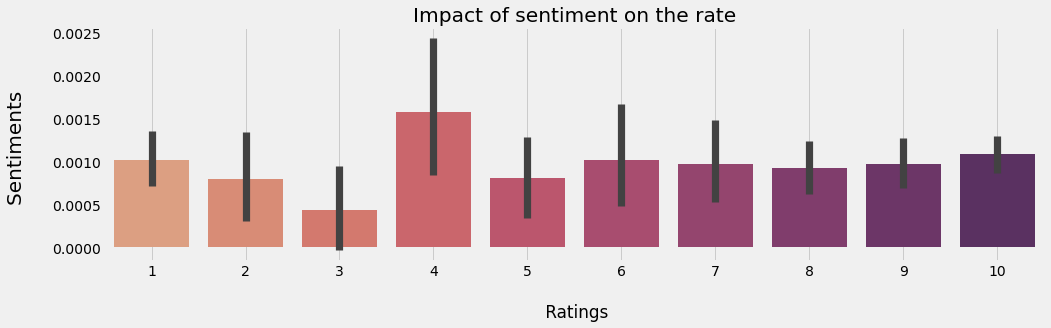

In [31]:
# lets check the Impact sentiments on the rating
plt.rcParams['figure.figsize'] = (15, 4)
sns.barplot(data['rating'], data['sentiment'], palette = 'flare')
plt.grid()
plt.title('Impact of sentiment on the rate')
plt.xlabel('\n Ratings')
plt.ylabel('Sentiments \n', fontsize = 20)
plt.show()

###  As we can see that Sentiment and Length of the review are not related to ratings, we will drop these features

In [32]:
# Lets remove the unique ID, data, review, len and sentiment column also
data = data.drop(['date', 'uniqueID', 'sentiment', 'review', 'len'], axis = 1)

# Lets check the name of the columns now
data.columns

Index(['drugName', 'condition', 'rating', 'usefulCount'], dtype='object')

## Feature Engeneering

In [33]:
# Lets calculate an Effective rating, create a feature is an important tool in feature engeneering
min_rating = data['rating'].min()
max_rating = data['rating'].max()

def scale_rating(rating):
    rating -= min_rating
    rating = rating/(max_rating-1)
    rating *= 5
    rating = int(round(rating, 0))
    
    if(int(rating) == 0 or int(rating) == 1 or int(rating) == 2):
        return 0
    else: 
        return 1
data['eff_score'] = data['rating'].apply(scale_rating)         

In [34]:
# After create the effective rating, lets also calculate the usefulness Score
data['usefulness'] = data['rating'] * data['usefulCount'] * data['eff_score']

# Lets check the Top 10 Most Useful Drugs with their respective Conditions
data[['drugName', 'condition', 'usefulness']][data['usefulness'] >
                                             data['usefulness'].mean()].sort_values(by='usefulness',
                                             ascending = False).head(10).reset_index(drop = True)

drugName      condition  usefulness
0      Sertraline     Depression       12910
1          Zoloft     Depression       12910
2  Levonorgestrel  Birth Control       12470
3          Mirena  Birth Control       12470
4          Zoloft     Depression        8541
5     Phentermine    Weight Loss        7960
6        Adipex-P    Weight Loss        7960
7        Implanon  Birth Control        7300
8         Viibryd     Depression        6930
9      Vilazodone     Depression        6930

## Analysing the medical condition

In [37]:
# Lets calculate the number of Useless and Useful Drugs for each Condition
# Useful = 1; Useless = 0

@interact
def check(Condition = list(data['condition'].value_counts().index)):
    return data[data['condition'] == Condition]['eff_score'].value_counts()

interactive(children=(Dropdown(description='Condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…

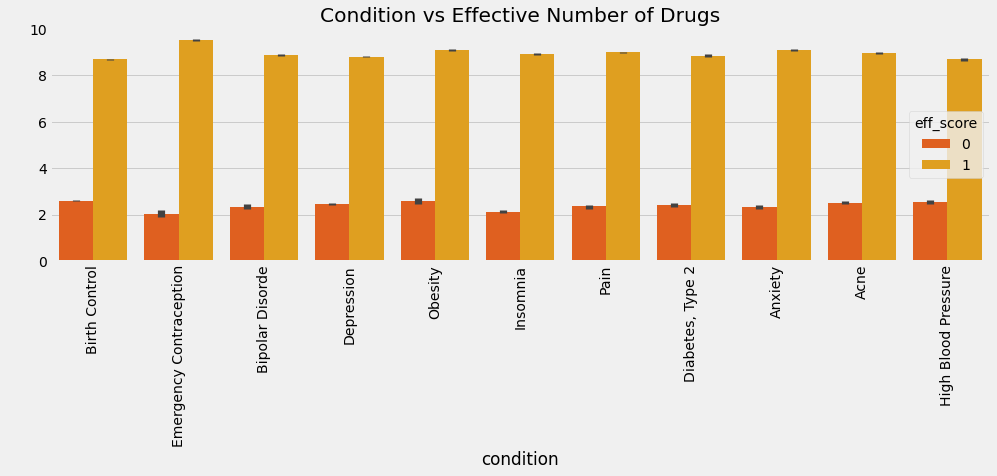

In [40]:
# Lets check this in graph
popular_conditions = ('Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne', 'Bipolar Disorde', 'Insomnia', 'Weigh LOSS',
                    'Obesity',' ADHD', 'Diabetes, Type 2', 'Emergency Contraception', 'High Blood Pressure', 'Migrane')
conditions = data.loc[data['condition'].isin(popular_conditions)]

sns.barplot(x = conditions['condition'], y = conditions['rating'], hue = data['eff_score'],
           palette = 'autumn')
plt.title('Condition vs Effective Number of Drugs')
plt.xticks(rotation = 90)
plt.ylabel(' ')
plt.show()

In [42]:
# Lets check the 10 most common conditions
print("Number of Unique Conditions :", data['condition'].nunique())
data['condition'].value_counts().head(10)

Number of Unique Conditions : 884


Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Weight Loss         3609
Obesity             3568
ADHD                3383
Name: condition, dtype: int64

In [43]:
# Lets Check Drugs which were useful to Highest Number of people
data[['drugName','usefulCount','rating']][data['usefulCount'] >
                                    data['usefulCount'].mean()].sort_values(by='usefulCount',
                                                        ascending = False).head(10).reset_index(drop=True)

drugName  usefulCount  rating
0          Zoloft         1291      10
1      Sertraline         1291      10
2  Levonorgestrel         1247      10
3          Mirena         1247      10
4          Zoloft          949       9
5        Adipex-P          796      10
6     Phentermine          796      10
7          Celexa          771       8
8      Citalopram          771       8
9        Implanon          730      10

In [44]:
data.shape

(160398, 6)

In [45]:
# Lets remove all duplicates from the Dataset
data = data.drop_duplicates()

In [46]:
data.shape

(113977, 6)

In [47]:
# Lets find the Highest and Lowest rated drugs for each Condition
@interact
def high_low_rate(Condition = list(data['condition'].value_counts().index)):
    print("\n Top 5 Drugs")
    print(data[data['condition'] == Condition][['drugName','usefulness']].sort_values(by = 'usefulness',
                                               ascending = False).head().reset_index(drop=True)) 
    
    print("\n\n 5 Bottom Drugs")
    print(data[data['condition'] == Condition][['drugName','usefulness']].sort_values(by = 'usefulness',
                                               ascending = True).head().reset_index(drop=True))

interactive(children=(Dropdown(description='Condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…